# Artificial Neural Network For Credit Risk Prediction


## Project Introduction:

Welcome to credit risk prediction project. Here, we will use Artificial Neural Network (ANN) to predict the likelihood of loan defaults, helping financial institutions make informed lending decisions. The dataset is downloaded from Kaggle.

Download Dataset here: https://www.kaggle.com/datasets/upadorprofzs/credit-risk

**Motivation**

Accurately assessing credit risk is crucial in the financial sector. It helps businesses minimize losses from defaulting loans, optimize lending strategies, and build trust with customers. Using advanced analytical techniques, companies can enhance risk management, streamline processes, and make faster, more efficient decisions.

**Why Predict Creditworthiness?**

Predicting creditworthiness offers several benefits:

* Risk Management: Identifies potential defaulters to reduce losses.

* Efficiency: Facilitates credit approval process and reduces manual effort and cost.

* Customer Relationships: Helps build trust by accurately identifying reliable borrowers.

**About the Dataset**

Our dataset includes features like income, age, and loan, with the target variable being default (0 or 1). Here 0 means the customer has not defaulted and 1 means the customer has defaulted paying the loan. This data provides insight into the financial profiles of customers.

**Approach**

We will use ANN to predict credit risk. Our goal is to understand credit risk assessment and demonstrate the effectiveness of machine learning in this area.

**Data Cleaning, Visualization and Preprocessing**

Before model training, we will clean and preprocess the data. This includes handling missing values, selecting key features (income, age, loan), splitting the data into training and testing sets and scaling the data. We will also visualize the data to find quick insights for business decisions and to select our scaling method.

**Model Training**

We will train our ANN model as it captures complex patterns with a neural network structure.

**Hyperparameter Tuning**

We'll fine-tune the model's parameters to optimize its performance. This might include adjusting settings like the number of epochs, number of hidden layers, dropout layers and their rates, regularization, learning rates etc, to improve accuracy and prevent overfitting or underfitting.

**Evaluation**

We will evaluate model performance using confusion matrix and various scores like accuracy, precision, recall and F1. This will help us understand model's strengths and weaknesses in predicting credit risk. We will also use accuracy and loss visualization to help us in this process.

By leveraging this model, I aim to provide accurate, data-driven insights to improve lending decisions and provide financial stability.

## About the Dataset:

**Overview:**

The purpose of this database is to provide information about a bank's customers so that machine learning models can be developed that can predict whether a particular customer will repay the loan or not.


## Importing Libraries

Here, we import necessary libraries such as NumPy, Pandas, Seaborn, and Matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mounting Google drive and then loading the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/All Data/original.csv'

credit_risk_raw = pd.read_csv(file_path, delimiter=',')

credit_risk_raw.head()

Mounted at /content/drive


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


## Exploratory Data Analysis (EDA)
Checking Dataset Shape.

In [ ]:
credit_risk_raw.shape

(2000, 5)

We have 2000 rows and 5 columns.

In [ ]:
credit_risk_raw.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

Above are our features ("income", "age" and "loan") and target variable ("default"). We will not use "clientid" in this modelling, as this would not have any effect on our predictive capabilities.

We will now proceed to understand the data types of each column and see if we need to change any data type for the purpose of our ANN.

In [ ]:
credit_risk_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


From above we see that all the data types are in correct order, and we do not need to change anything.

Now we will proceed to find out if there are any empty cell or cells with NaN values.

In [ ]:
credit_risk_raw.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

We can see from above that there are only 3 cells with NaN values in our dataset. We will decide how to impute these cells later, depending on the distribution of the data. Since we only have missing data in "age" column, which is numeric, we will decide on using mean or median to impute the missing data depending on presence of outliers.

Although we only have 3 empty cells in the whole dataset, we will still calculate the percentage of missing data in the dataset. For this we will create a function which will give us percentage of empty cells in each column.


In [ ]:
def percent_null(column):
  '''
  Iterate through relevant columns to get percentage
  of NaN values for each column or just pass one column
  as argument to get percentage NaN value for that column.
  '''
  total_cells = np.prod(column.shape)
  missing_values = column.isnull().sum()

  percent_null = (missing_values / total_cells) *100

  return percent_null


In [ ]:
# Iterating through all the columns to get the percentage of NaN values for each
# column by applying the function above (percent_null).
for column in credit_risk_raw.columns:
  percent_null_value = percent_null(credit_risk_raw[column])
  print(f"{column}:{percent_null_value:.2f}%")


clientid:0.00%
income:0.00%
age:0.15%
loan:0.00%
default:0.00%


We see that percentage wise it does not make a huge difference. Only 0.15% of data is missing in the whole dataset and I am confident that it wouldn't make a significant impact on our predictive capabilities, whether we choose to impute these cells or delete them.

Now we will find out if there are any cells with just whitespaces, in our dataset.

In [ ]:
blanks = []

# Using itertuples(), it returns a tuple with the index as the first element,
# followed by the row values in following indexes.
# Iterate through each row using itertuples.
for row in credit_risk_raw.itertuples():
    # Iterate through each cell in the row.
    for cell in row[1:]:  # Skip the first element which is the index.
        if str(cell).isspace():  # Convert cell to string and check if it contains only whitespace.
            blanks.append(row.Index)  # Append index of the row with whitespace to the blanks list.

print(blanks)  # Printing the results to see all index position which has whitespaces.

[]


We see that there are no cells with just whitespaces in our dataset.

In [ ]:
credit_risk_raw.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


We have some valuable information from data description above. We see that the average age of our customer is around 40 years with 45331 as their average income and 4444 being their average loan amount.

However, there is a concern here. We see that the minimum age of customer is recorded as -52.42 which is not plausible for age. This represents significant outlier in this column. The presence of outliers in this column also means that the average age of around 40 years may not represent the age of a typical customer for this dataset.

## Data Cleaning

### Dropping Rows

Since age cannot be in negative, I am treating the negative entries as data entry errors. Therefore, I will find out how many such negative entries (or even entries as zero) are present in the "age" column and understand how to deal with them.

In [ ]:
# Using a for loop with enumerate function to get the index and values
# of all the entries less than zero in "age" column.
for index, value in enumerate(credit_risk_raw['age']):
  if value < 1:
    print(f"{index} : {value}")

15 : -28.218361321371003
21 : -52.4232799196616
26 : -36.4969755136408


We have only 3 such entries (at index 15, 21 and 26) in this column, with 1997 entries in total, which means we do not have significant number of data entry errors. I am confident that removing these negative entries will significantly remove the effects of outliers and will give us a better predictive modelling.

In [ ]:
# Removing rows with data entry errors in "age" column.
credit_risk_raw = credit_risk_raw.drop([credit_risk_raw.index[15], credit_risk_raw.index[21], credit_risk_raw.index[26]])

We will run the for loop again to find out if these rows are removed.

In [ ]:
# Using a for loop with enumerate function to get the index and values
# of all the entries less than zero in "age" column.
for index, value in enumerate(credit_risk_raw['age']):
  if value < 1:
    print(f"{index} : {value}")

We see that now there are no negative or zero entries in the "age" column.

In [ ]:
credit_risk_raw.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


### Imputing Data

We will look at the description of the dataset again, after removing the negative values from the "age" column, to see how much it has affected the mean.

In [ ]:
credit_risk_raw.describe()

,clientid,income,age,loan,default
count,1997.000000,1997.000000,1994.000000,1997.000000,1997.000000
mean,1001.970456,45326.596720,40.927700,4442.124566,0.141713
std,576.679293,14327.971550,13.271802,3045.494192,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.043284,1936.813257,0.000000
50%,1002.000000,45788.747100,41.382673,3971.155479,0.000000
75%,1501.000000,57787.565659,52.616900,6429.593688,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


We don't see much change in the mean of age after removing the outliers. We don't see any significant changes in other columns either.

To select an imputing strategy for missing cells in "age" column, we will plot the distribution of this column to see how much it's still affected by outliers.

Text(0.5, 1.0, 'Age Distribution by Default Status')

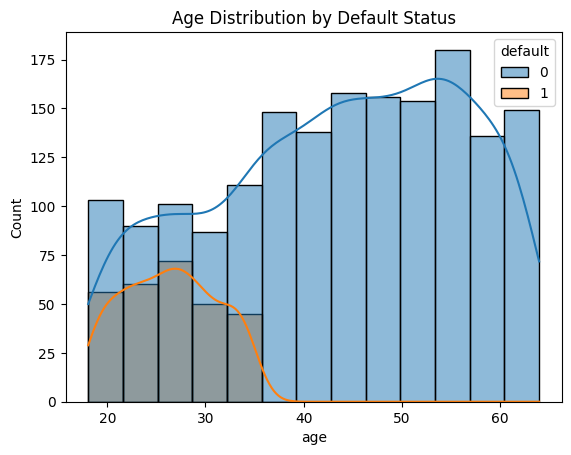

In [ ]:
sns.histplot(data=credit_risk_raw, x="age", hue="default", kde=True).set_title("Age Distribution by Default Status")

We see that there are still outliers in this column, especially if we segregate the plot with default status. Therefore, I will use median as a strategy to impute the missing cells in "age" column, as it is less sensitive to outliers. We will use SimpleImputer for this.

In [ ]:
from sklearn.impute import SimpleImputer

# Creating an instance in SimpleImputer class.
median_imputer = SimpleImputer(strategy="median")

# Fitting and transforming our data with SimpleImputer.
credit_risk_raw[['age']] = median_imputer.fit_transform(credit_risk_raw[['age']])

In [ ]:
# Checking for empty cells or cells with NaN value after imputing.
credit_risk_raw.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

We see that we don't have any missing entries in the whole dataset after imputing.

### Dropping Columns

As we don't need "clientid" column for our modelling, therefore we will drop this column to create our clean dataset ready for visualization.

In [ ]:
credit_risk_clean = credit_risk_raw.drop(["clientid"], axis=1)
credit_risk_clean

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


## Data Visualization

### Distributions

To start with data visualization, we will look at the distribution of our features and target variable.

In [ ]:
credit_risk_clean.columns

Index(['income', 'age', 'loan', 'default'], dtype='object')

We will plot the distribution for all columns with a for loop.

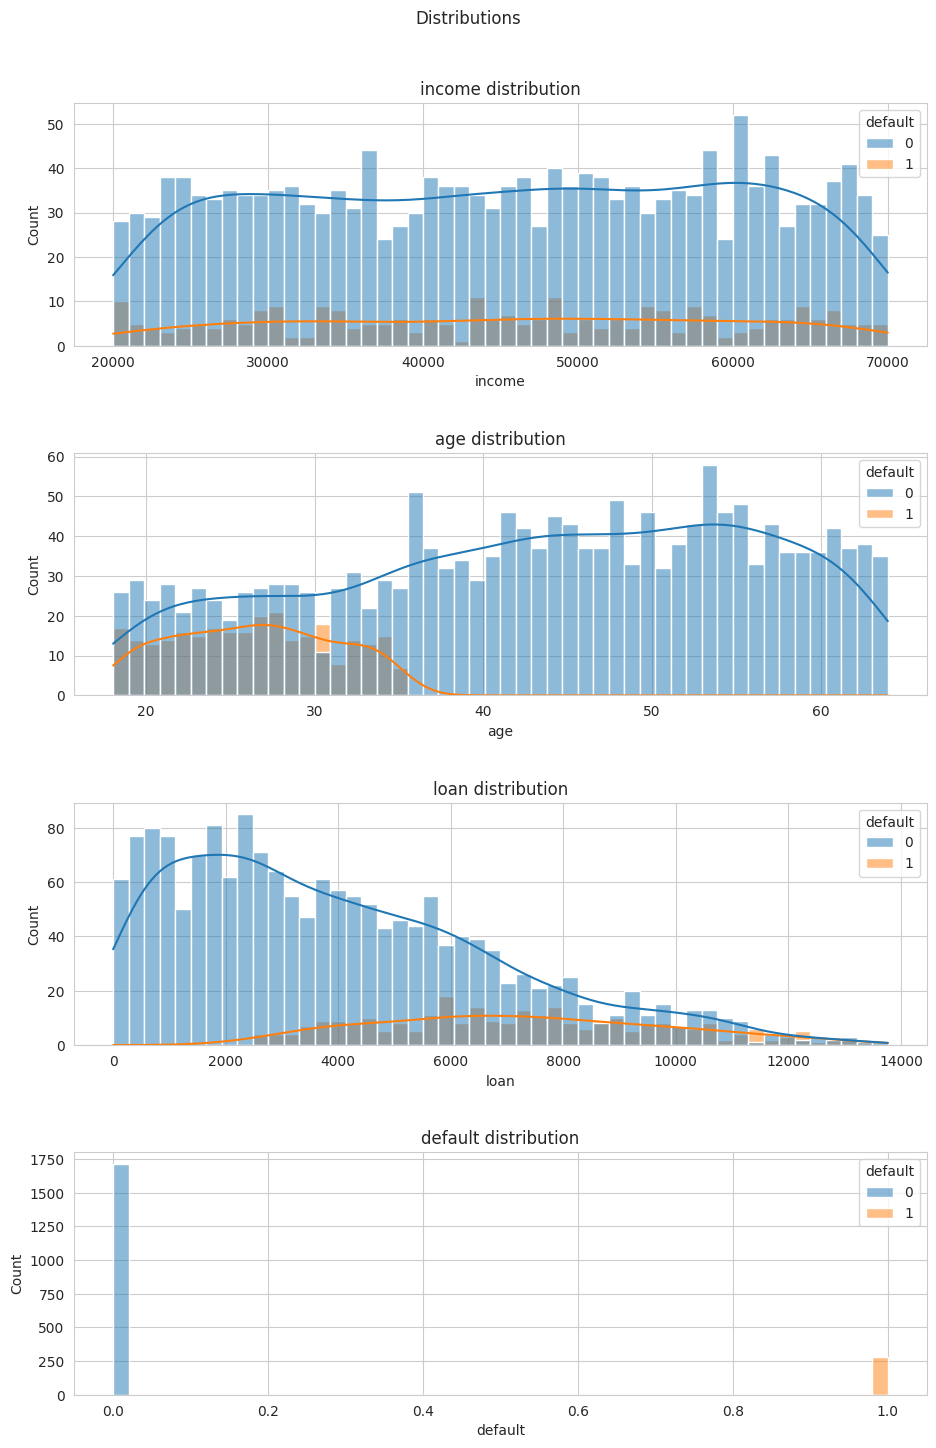

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(4, 1, figsize=(10, 15)) # Defining our subplots.
fig.suptitle('Distributions') # Setting figure title.

# We will iterate through all columns with a for loop and enumerate function
# to plot their distributions on separate graphs.
for index, column in enumerate(credit_risk_clean[['income', 'age', 'loan', 'default']]):
  # Plotting our column in iteration on a histplot along with kde plot. We will also set the hue as "default" column
  # to understand the default and non default segregation visually.
  sns.histplot(data=credit_risk_clean, x=column, ax=ax[index], hue="default", kde=True, bins=50)
  ax[index].set_title(f"{column} distribution") # Setting plot title.

plt.tight_layout(pad=3) # Adjusting the padding around the plots for better visibility.
plt.show()


From the distribution plots we see that all our features contain outliers. This pattern is even prominent when the data is segregated by defaults and non defaults. For example, most of the loans are taken by people aged between 50-60 but most of the defaults are made by people aged between 25-30. On the other hand, most people took loans between 2k-3k.

The distribution plots provide a sneak peek into the insights of this data. However, to get better insights, we will create a pairplot with kde.

Text(0.5, 1.02, 'Unscaled Data')

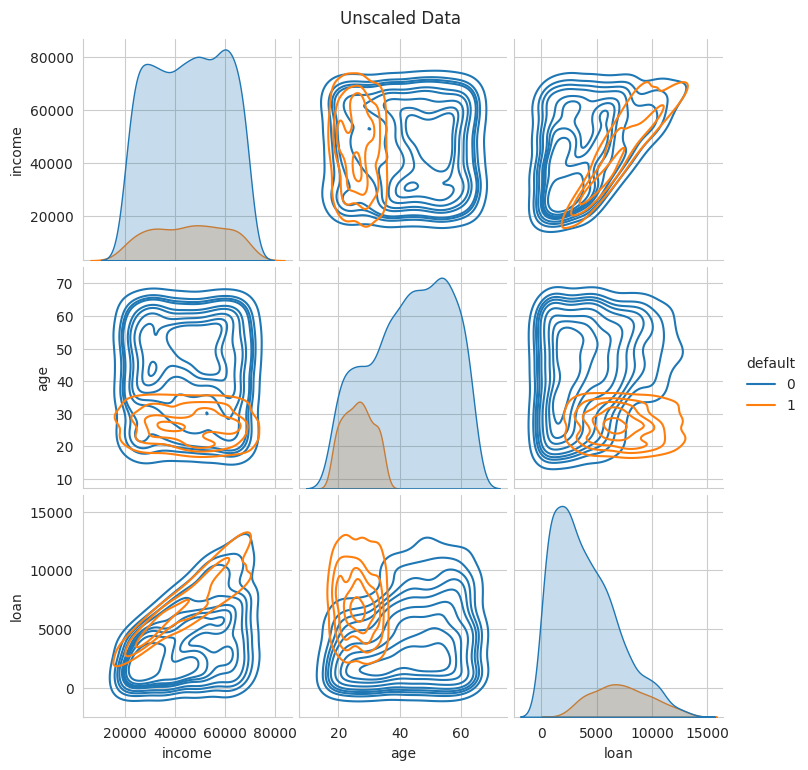

In [ ]:
sns.pairplot(data=credit_risk_clean, hue="default", kind="kde").fig.suptitle("Unscaled Data", y=1.02)

We see that a pairplot with kde gives a deeper insight and shows patterns.

Before going forward and discuss scaling strategies through data visualization, I cannot help but comment on some of the business insights which are obvious from the pairplot above.

**Business Insights**

* **Critical Threshold**: Loans Exceeding 12% of Income Significantly Increase Default Risk: We see from income vs loan graph (x axis=income, y axis=loan) that all the default lies at the top, which means that customers are more likely to default if the loan amount cross a percentage of income. We also have a concentration of this pattern in the area with income between 22k-42k and loan amount between 4k to 8k. I have estimated this threshold to be around 12% and made a plot below to check my hypothesis and it came out to be correct.

  This means that if the loan amount crosses 12% of the customer's income, then there is a high likelihood that the customer will default on their loan. Actually, we have calculated this likelihood as well in later sections, and found this to be around 37% chance of defaulting if the condition above is true.

  This also means that the best way for the lending institution will be to make the process of approving a loan (when it crosses 12% of income), stringent to make sure that the customer can pay back their loan.

* **Critical Threshold**: Age between 20-35 Significantly Increase Default Risk: We also see from the age vs loan plot, that all the defaults are between the age of 20-35 with major concentration around age 28-32.

  It is also evident that the amount of loan to this age group does not has any effect on the chances of defaulting as the loan amount of default customers ranges from around 2.5k to 12.5k.

  This theory is also confirmed through the income vs age plot (x axis=income, y axis=age) where we see that all the default lies at the bottom of the graph, and it spreads from lowest of income to highest on income. This basically means that the level of income has a lower effect than the age of the customer, on whether the customer will default or not.

  The lending institution should also make credit approval process more stringent for this age group to ensure credit repayments.



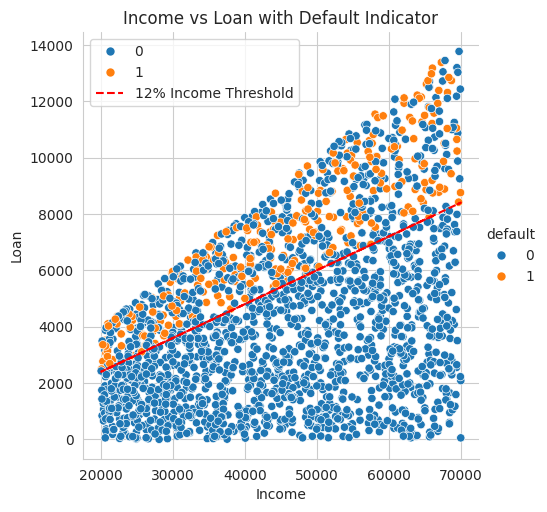

In [ ]:
# Creating a relationship plot between "income" and "loan" column to
# prove our hypothesis that all the defaults loan lies above the 12%
# threshold of income.
sns.relplot(data=credit_risk_clean, x="income", y="loan", hue="default")

# Defining the percentage cap (12%).
percentage_cap = 0.12

# Calculating the line values.
income_values = credit_risk_clean['income']
loan_threshold = income_values * percentage_cap

# Plotting the threshold line.
plt.plot(income_values, loan_threshold, color='red', linestyle='--', label='12% Income Threshold')

# Adding labels and title.
plt.xlabel('Income')
plt.ylabel('Loan')
plt.title('Income vs Loan with Default Indicator')
plt.legend()


We will also calculate the percentage of customer who have taken more than 12% of their income as loan and defaulted (among all customers who have taken more than 12% of income as loan).

For this we will have to reset the index as it is now missing few rows after we have deleted them.

In [ ]:
credit_risk_clean = credit_risk_clean.reset_index(drop=True)

Understanding the percentage with a for loop.

In [ ]:
default = 0
non_default = 0

# We will use for loop with enumerate function to iterate over
# indexes and values of every cell in "loan" column.
for index, value in enumerate(credit_risk_clean["loan"]):
  income = credit_risk_clean.loc[index, "income"] # Finding the value of cell in "income" column of row in iteration.
  default_status = credit_risk_clean.loc[index, "default"] # Finding the value of cell in "default" column of row in iteration.
  # Storing the count of default and non default customers (if more than 12% of income as loan)
  # in seperate lists.
  if value > (income * 0.12):
    if default_status == 0:
      non_default += 1
    else:
      default += 1

# Calculating total customers with over 12% of income as loan.
total_above_threshold = default + non_default
# Printing percentage of default customer over total customers with more than 12% of income as loan.
print(f"Total default over threshold percentage: {default / total_above_threshold * 100:.2f}%")


Total default over threshold percentage: 36.99%


We see that out of the total customers who have taken more than 12% of their income as loan, almost 37% of them have defaulted.

Before we enter to our preprocessing stage, we will have a quick look at the correlation within our features and features with target variable. We will do this by creating a heatmap of our clean dataset.

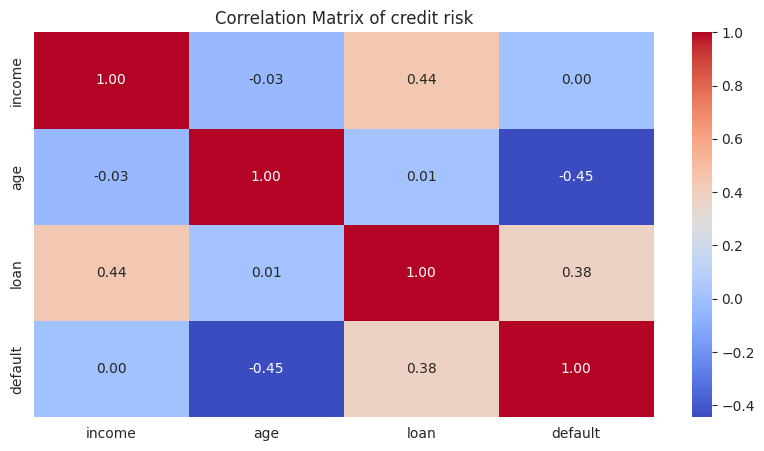

In [ ]:
corr = credit_risk_clean.corr()  # Calculating correlation.

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm") # Creating a heatmap.
plt.title('Correlation Matrix of credit risk') # Setting plot title.
plt.show()

We see that correlation among all the features are below acceptable level of 50%. We also see that some features like "income" does not have any correlation and "age" has a negative correlation with our target variable. However, as we don't have many features in our dataset, we will include these to best predict our target variable.

## Data Preprocessing

### Splitting data into features and target.

In [ ]:
X = credit_risk_clean.iloc[:, :-1] # All columns except the last one.
y = credit_risk_clean.iloc[:, -1] # Last column.

### Selecting our scaler

To selct a scaler, first we will scale our features using all the scaling methods avialable with linear transformation. We will then plot our scaled data with each scaling method, see their effects, and then choose a scaler. The choice lies in the ability of a scaling method to bring all the features between a certain range, as it is detrimental for our neural network to avoid big oscillations.

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

ss = StandardScaler() # Creating an instance in StandardScaler.
ms = MinMaxScaler() # Creating an instance in MinMaxScaler.
rs = RobustScaler() # Creating an instance in RobustScaler.

X_ss = ss.fit_transform(X) # Fitting and transforming our features with StandardScaler.
X_ms = ms.fit_transform(X) # Fitting and transforming our features with MinMaxScaler.
X_rs = rs.fit_transform(X) # Fitting and transforming our features with RobustScaler.

In [ ]:
# Converting all our scaled data into dataframes so that I can plot
# them to see the effects of each scaling method.
X_ss = pd.DataFrame(data=X_ss, columns=["income", "age", "loan"])
X_ms = pd.DataFrame(data=X_ms, columns=["income", "age", "loan"])
X_rs = pd.DataFrame(data=X_rs, columns=["income", "age", "loan"])

Text(0.5, 1.02, 'StandardScaler Effect')

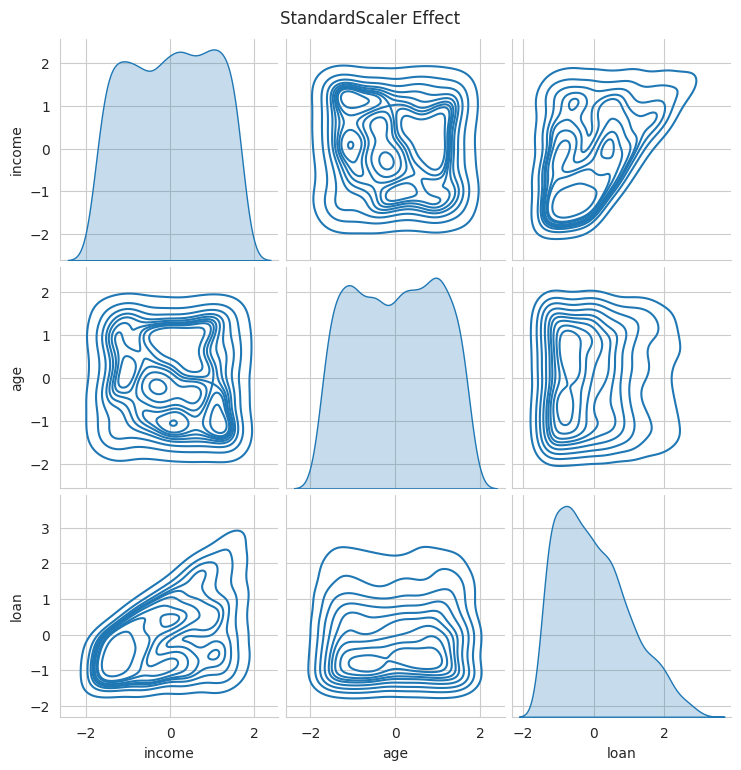

In [ ]:
# Plotting scaled features with StandardSaler.
sns.pairplot(data=X_ss, kind="kde").fig.suptitle("StandardScaler Effect", y=1.02)

Text(0.5, 1.02, 'MinMaxScaler Effect')

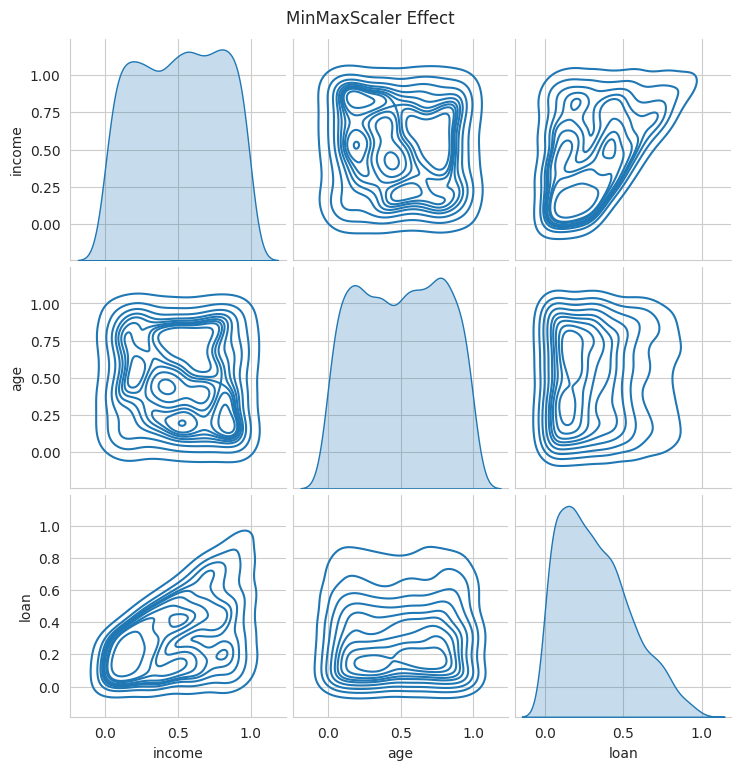

In [ ]:
# Plotting scaled features with MinMaxScaler.
sns.pairplot(data=X_ms, kind="kde").fig.suptitle("MinMaxScaler Effect", y=1.02)

Text(0.5, 1.02, 'RobustScaler Effect')

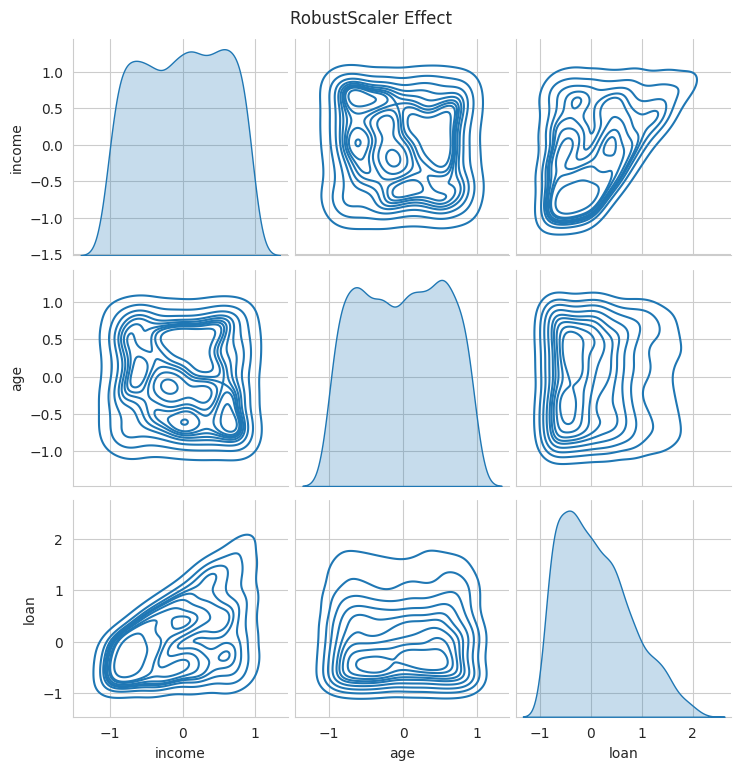

In [ ]:
# Plotting scaled features with RobustScaler.
sns.pairplot(data=X_rs, kind="kde").fig.suptitle("RobustScaler Effect", y=1.02)

Following is the statistics of the effect produced by each sclaing method:

**StandardScaler:**

* Income Vs Loan: Income is between -2 and 2 but loan is between -2 and 3.

* Age Vs Loan: Age is between -2 and 2 but loan is between -2 and 2.5.

* Income Vs Age: Income in between -2 and 2 and Age is also between -2 and 2.


**MinMaxScaler:**

* Income Vs Loan: Income is between 0 and 1 and loan is also between 0 and 1.

* Age Vs Loan: Age is between 0 and 1 but loan is between 0 and 0.9.

* Income Vs Age: Income in between 0 and 1 and Age is also between 0 and 1.

**RobustScaler:**

* Income Vs Loan: Income is between -1 and 1 but loan is between -1 and 2.

* Age Vs Loan: Age is between -1 and 1 but loan is between -1 and 1.5.

* Income Vs Age: Income in between -1 and 1 and Age is also between -1 and 1.



From above statistics, we can see that MinMaxScaler does the best job of scaling all the features in the same range and RobustScaler does the worst. StandardScaler lies somewhere in between. Therefore, the logical choice would be to select MinMaxScaler. However, we have to be careful about the outliers when we are scaling with MinMaxScaler, as it is most sensitive to outliers.

We can also see from our distribution graphs in pairplots above, that we still have significant presence of outliers. Therefore, I will choose StandardScaler as our scaling method as it is less sensitive to outliers than MinMaxScaler and does a better job then RobustScaler.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting our features and target variable into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
X_train = ss.fit_transform(X_train) # Fit and transform our X_train data.
X_test = ss.transform(X_test) # Only transform our X_test data as we want this to act like unseen data.

## ANN

### Discussion:



Artificial Neural Networks (ANNs) have proven to be effective in classification tasks, capable of learning intricate patterns within data. This discussion outlines the rationale behind the architecture and configuration of our ANN for predicting credit risk, focusing on features such as income, age, and loan amount to predict the likelihood of default.

**Activation Function:**

For our classification task, we will use Rectified Linear Unit (ReLU) activation function for our hidden layers. ReLU is preferred due to its several advantages over traditional activation functions such as Sigmoid or Tanh. Specifically, ReLU helps to:

* Promote sparsity by setting negative values to zero, which can reduce the risk of overfitting and improve model generalization [1].

* Mitigate the issue of vanishing gradients, ensuring more stable and efficient training [2].

For the output layer, we will use the Sigmoid activation function. The Sigmoid function is appropriate for binary classification tasks as it outputs a probability value between 0 and 1, indicating the likelihood of a given input being classified as a default (1) or non-default (0). We will then convert this probability to 0 or 1 label by assigning y_pred to y_pred > 0.5 (more than 50% probability).

**Optimizer:**

We will select Adam optimizer for training our ANN. Adam (Adaptive Moment Estimation) offers several benefits that make it suitable for our classification task:

* Combines the advantages of AdaGrad and RMSProp, providing improved convergence and adaptability to different learning rates [3].

* Dynamically adjusts the learning rate for each parameter based on estimates of the first and second moments of the gradients. This helps in efficiently navigating both steep and flat regions of the loss landscape.

* Avoids large oscillations or premature convergence to suboptimal solutions, enhancing the stability of the training process.
The adaptive nature of Adam ensures that our model can effectively handle the high-dimensional parameter space and efficiently minimize the loss function, leading to better performance.

**Loss Function:**

For our binary classification task, we will use the Binary Cross-Entropy loss function. Binary Cross-Entropy is well-suited for scenarios where the target variable is binary (0 or 1), as it:

* Measures the performance of the classification model by comparing the predicted probabilities to the actual binary labels. This aligns with our objective of accurately predicting default risk.

* Penalizes incorrect predictions more heavily, thereby guiding the model towards better performance during training.

* Facilitates efficient convergence by ensuring that the model learns to differentiate between default and non-default cases effectively.

By employing Binary Cross-Entropy, we ensure that our model is optimized to minimize the discrepancy between the predicted probabilities and the actual outcomes, thereby improving the accuracy of our predictions.

**Evaluation Metric:**

We use accuracy as the primary evaluation metric to assess our model's performance. Accuracy is a straightforward and widely used metric in  classification tasks, representing the proportion of correctly predicted instances out of the total instances. However, given the imbalance in the dataset (fewer defaults than non-defaults), we will also monitor other metrics such as precision, recall, and F1-score during model evaluation to ensure a comprehensive evaluation of our model's performance. Addtionally, we will keep a keen eye on the accuracy and loss graph for both training and test sets, to better facilitate this process.

This structured approach ensures that each component of the ANN is chosen to optimize performance for the classification task at hand.

In [ ]:
import tensorflow as tf

# Building an ANN.
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(40, activation='relu')) # Dense layer (hidden) with 40 neurons and Relu activation function.
ann.add(tf.keras.layers.Dense(40, activation='relu')) # Dense layer (hidden) with 40 neurons and Relu activation function.
# Dense layer (Output) with one neuron and sigmoid activation function. As it is a binary classification task, the neuron can
# be either 0 or 1.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling our ANN with adam optimizer, binary crossentropy loss function and accuracy as metrics.
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting our training data in our ANN. Also assigning validation_data as test data.
# Setting batch size as 10 and we will run this for 39 epochs.
history = ann.fit(X_train, y_train, batch_size = 10, epochs = 39, validation_data=(X_test, y_test))

Epoch 1/39
160/160 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.8842 - val_loss: 0.1481 - val_accuracy: 0.9600
Epoch 2/39
160/160 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9662 - val_loss: 0.0840 - val_accuracy: 0.9725
Epoch 3/39
160/160 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9743 - val_loss: 0.0626 - val_accuracy: 0.9825
Epoch 4/39
160/160 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9831 - val_loss: 0.0486 - val_accuracy: 0.9850
Epoch 5/39
160/160 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9900 - val_loss: 0.0380 - val_accuracy: 0.9925
Epoch 6/39
160/160 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9950 - val_loss: 0.0349 - val_accuracy: 0.9900
Epoch 7/39
160/160 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9937 - val_loss: 0.0278 - val_accuracy: 0.9975
Epoch 

In [ ]:
y_pred = ann.predict(X_test) # Predicting on test data.
# Converting probabilities to binary class labels (0 or 1) based on a threshold of 0.5 (above 50%).
y_pred = (y_pred > 0.5) #

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred_train = ann.predict(X_train) # Predicting on training data.
# Converting probabilities to binary class labels (0 or 1) based on a threshold of 0.5.
y_pred_train = (y_pred_train > 0.5)

50/50 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Creating a confusion matrix with test data and predicted data.
cm = confusion_matrix(y_test, y_pred)
print(cm) # Printing confusion matrix
accuracy_score(y_test, y_pred) # Printing test accuracy score.

[[346   0]
 [  1  53]]


0.9975

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Creating a confusion matrix with training data and predicted data.
cm = confusion_matrix(y_train, y_pred_train)
print(cm) # Priting confusion matrix.
accuracy_score(y_train, y_pred_train) # Printing training accuracy score.

[[1368    0]
 [   2  227]]


0.9987476518472135

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred) # Finding test set precision score.
recall = recall_score(y_test, y_pred) # Finding test set recall score.
f1 = f1_score(y_test, y_pred) # Finding test set F1 score.

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 1.00
Recall: 0.98
F1-score: 0.99


Analysis:

Precision: This measures the proportion of positive identifications (defaults) that were actually correct. A precision of 1.00 means that 100% of the predicted defaults were indeed defaults. This indicates that our model has a very low false positive rate, which is crucial in credit risk prediction because it minimizes the number of non-defaulters incorrectly classified as defaulters.

Recall: This measures the proportion of actual positives (actual defaults) that were correctly identified. A recall of 0.98 means that 98% of the actual defaults were correctly identified by your model. This indicates that our model has a very low false negative rate, meaning it successfully identifies most of the true defaulters.

F1-score: This is the harmonic mean of precision and recall. An F1-score of 0.99 indicates a high level of accuracy, balancing both precision and recall. It suggests that our model performs exceptionally well in identifying defaulters while maintaining a low rate of false positives.

### Accuracy and Loss Visualization.

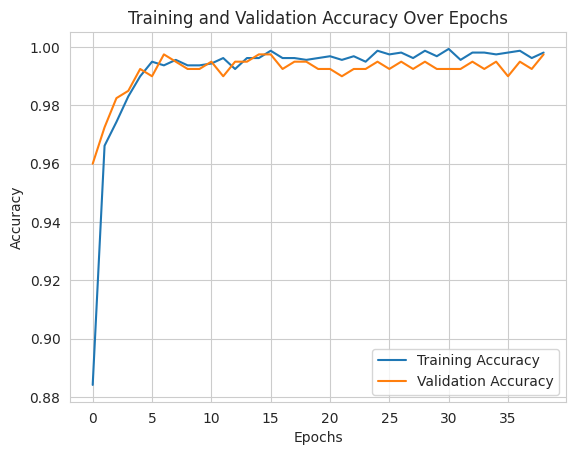

In [ ]:
# Creating accuracy plots for both training and test set.
fig, ax = plt.subplots()
sns.lineplot(history.history['accuracy'], label='Training Accuracy') # Creating line plot for training accuracy.
# Creating line plot for test accuracy. Note that on the figure it is termed as Validation Accuracy
# as we are plotting the accuracy for the data provided under validation_data while fitting our ANN.
# However, this is just accuracy for test data.
sns.lineplot(history.history['val_accuracy'], label='Validation Accuracy')
ax.set_title('Training and Validation Accuracy Over Epochs') # Setting title for the plot.
ax.set_xlabel('Epochs') # Setting label for x axis.
ax.set_ylabel('Accuracy') # Setting label for y axis.
plt.legend() # Showing the legend.
plt.show()

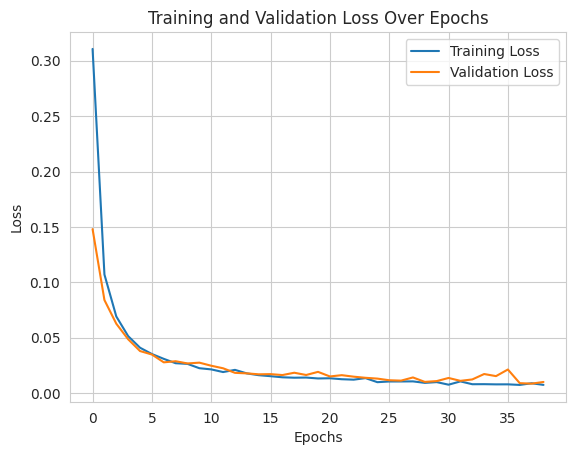

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(history.history['loss'], label='Training Loss') # Creating line plot for training loss.
# Creating line plot for test loss. Note that on the figure it is termed as Validation Loss
# as we are plotting the loss for the data provided under validation_data while fitting our ANN.
# However, this is just loss for test data.
sns.lineplot(history.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss Over Epochs') # Setting title for the plot.
ax.set_xlabel('Epochs') # Setting label for x axis.
ax.set_ylabel('Loss') # Setting label for y axis.
plt.legend() # Showing the legend.
plt.show()

### Hyperparameter Tuning Process for ANN Model:

1. **Initial Model Configuration:**

  **Understanding:**

  I commenced the hyperparameter tuning process with a relatively simple neural network architecture, consisting of 2 hidden layers with 40 neurons (little more than 10 times the number of features) each and an output layer with 1 neuron. As it is a binary classification task, we only need one neuron in the output layer which can be either 0 or 1. The neurons for input layer will be decided by the model itself in accordance with the number of features. I have decided on a Relu activation function for hidden layer, sigmoid activation function for output layer and an Adam Optimizer. I chose binary crossentropy loss as loss function as it is a binary classification task and also chose a batch size of 10 as this aligns with standard practices for small datasets, in neural network training. This is neither too small for the model to overfit and nor too large that the model cannot calculate the global minimum. I also chose 200 epochs for this initial setup. The number of epochs is arbitrary at this time, I will decide on changing the number of epochs after looking at the training and test accuracy and loss graphs. This initial setup should be sufficient to capture the patterns of the data as we have only 3 features to predict from and only 1997 observations.

  **Observations (Training and Test Scores):**
  
  The accuracy on training set comes to 100% and on the test set it comes to 99.5%. We have 2 False Positive (FP) and 0 False Negative (FN) in the test set and 0 FP or FN in training set. We also have a test set precision score of 96%, Recall score of 100% and F1 score of 98%. This means that the model is incorrectly classifying True Negatives (actual 0) to False Positives (type 1 error).

  **Observations (Training and Validation Accuracy Over Epochs Graph):**

  From the accuracy graph of training and test set, it seems like the accuracy of training set reaches to 100% twice below 50 epochs. Test set accuracy also shows a similar pattern, when below 50 epochs it reaches over 99%. However, it seems that both training and test accuracies stabilizes after 50 epochs.

 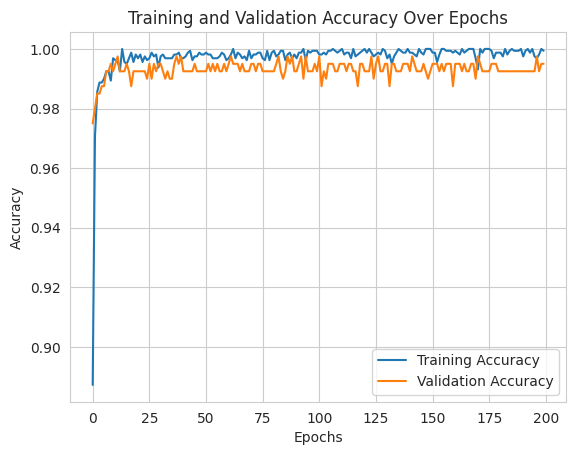
  
  **Observations (Training and Validation Loss Over Epochs Graph):**

  The loss graph of training and test set however, shows a slightly deeper insight. The training loss was very close to zero around 60 epochs and the training and test loss are almost same at this stage and then the gap between them increases. After this stage the training loss keep decending at slower pace but the test loss starts increasing, pinpointing a overfitting threshold.

  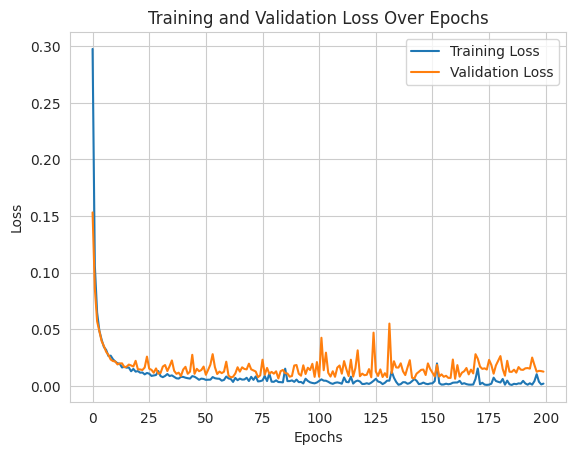

  **Conclusion**

  100% accuracy on training set clearly an indication towards overfitting. This is also evident by the accuracy and loss graphs where the model seems to learn extremely well below 50-60 epochs and generalise well as well. The gap between training and test loss after 50-60 epochs also indicates towards overfitting. Therefore, for the first step of hyperparameter tuning, I will decrease the number of epochs to mitigate this overfitting problem. It seems like the optimum number of epochs lies somewhere between 30 to 50 but since the training loss touches zero at around 175 epochs (at which point we can be convinced that the model is overfitted), I will reduce the number of epochs by 50 at a time to see the effect.

2. Decreased Number of Epochs to 150:

  **Observations (Training and Test Scores):**

  The accuracy score on the training set came to 99.93% with zero FP and one FN. The accuracy score on test set was 99.25% with 2 FP and 1 FN. The test set precision score came to 96%, recall score of 98% and F1 score of 97%. Which means that the model had difficulty identifying both negatives and positives.

  **Observations (Training and Validation Accuracy Over Epochs Graph):**

  The graph again shows that the training set reaches 100% and the test set reaches over 99% at 50 epochs. After this both goes flat with the gap between training and test set increasing frequently.

  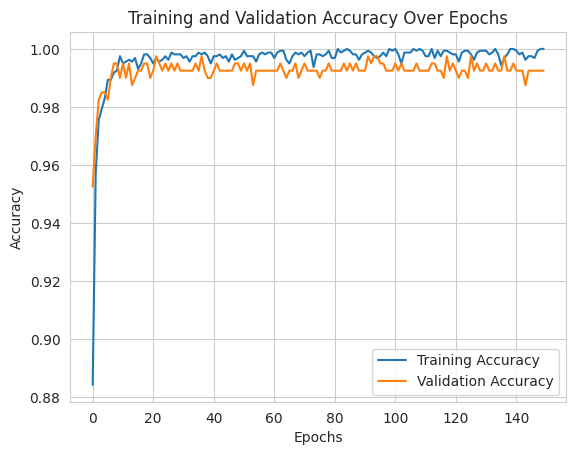

  **Observations (Training and Validation Loss Over Epochs Graph):**

  The graph shows that the gap between training and test loss increases after 40-50 epochs. Also, the training loss was very close to zero after around 80 epocs but does not touch zero till around 150 epochs.

  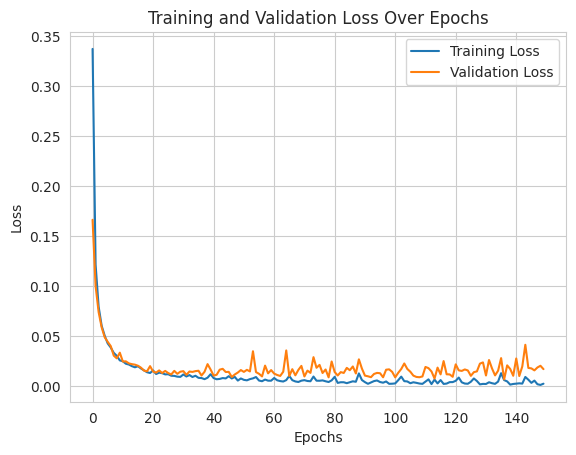

  **Conclusion**

  The model still seems to have overfitting issues with the gap between training and test set loss. Also, the flat nature of accuracy and loss graph after around 40-50 epochs tells us that we are still at very high number of epochs. I will go ahead and reduce the number of epochs again by 50, however, by this time I am fully convinced that the optimum number of epochs lies around the mark of 40-50.


3. Decreased Number of Epochs to 100:

  **Observations (Training and Test Scores):**

  We get a training set accuracy of 99.87% with zero FP and two FN. On test set we get an accuracy of 99.5% with one FP and one FN Also on the test set we get a precision score of 98%, recall score of 98% and F1 score of 98%, which means the model is still having troubles identifying both positives and negatives.

  **Observations (Training and Validation Accuracy Over Epochs Graph):**

  We get similar observation as before but with more insights. The accuracy of both training and test set is highest at around 40 epochs and then the training accuracy actually keeps rising at slow pace, but the test accuracy starts decreasing or stays flat after this stage, indicating the point (40 epochs) at which the model is overfitted.

  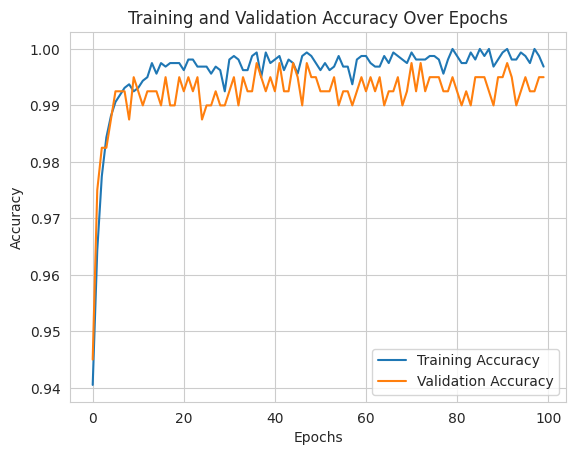

  **Observations (Training and Validation Loss Over Epochs Graph):**

  The observation on accuracy graph is confirmed by the training and test loss graph and we can clearly see that the training and test loss keeps decreasing till around 40 epochs and then the training loss continues a slow descent but the test loss keeps increasing slightly creating a gap.

  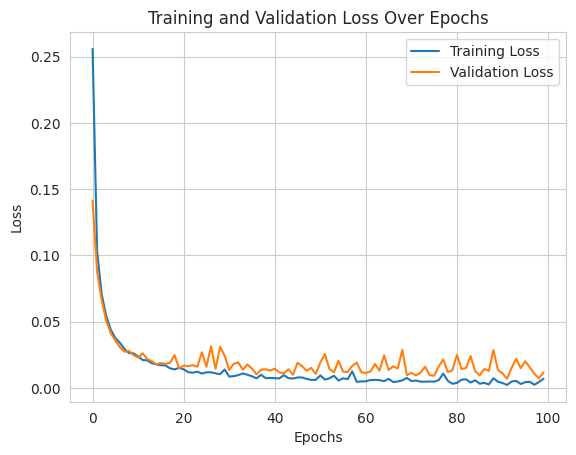

  **Conclusion**

  The zoomed in version shows insights which were not visible before and confirms that the model optimizes around 40 epochs. I will perform one last iteration with 50 epochs to pinpoint the excat number of epochs we will run the final model on.

4. Decreased Number of Epochs to 50:

  **Observations (Training and Test Scores):**
  
  We get a training accuracy of 100% with zero FP and zero FN which again shows overfitting. We get a test accuracy of 99.25% with two FP and one FN. We get a test set precision score of 96%, recall score of 98% and F1 score of 97% showing the model still has problems with identifying both positives and negatives.

  **Observations (Training and Validation Accuracy Over Epochs Graph):**

  The graph clearly shows the optimization at 40 epochs after which there is a clear gap between training and test accuracy with training accuracy touching 100% frequently.

  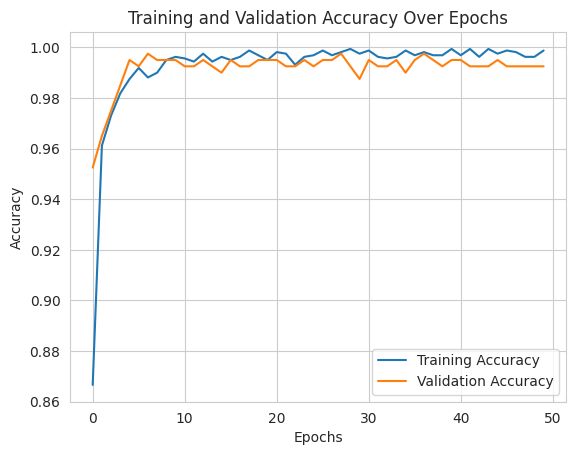

  **Observations (Training and Validation Loss Over Epochs Graph):**

  The loss graph confirms this theory and shows that the training and test loss both decreases till 40 epochs after which there is a decent in training loss but not in test loss.

  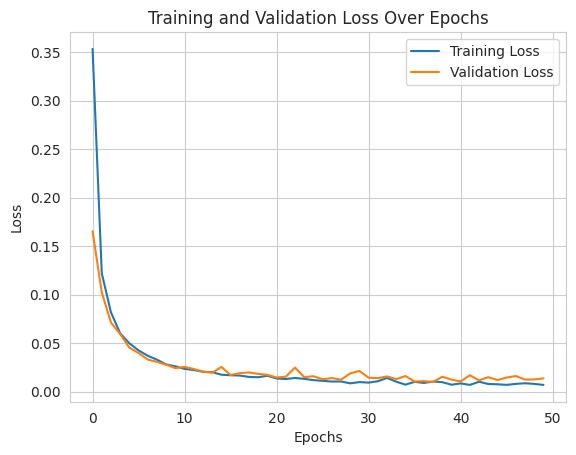

  **Conclusion**

  As the model seem to optimize at 40 epochs the logical choice would be to select this to run the next iteration. But I am going for 39 epochs as the loss graph shows that the test loss increases immediately after 40 epochs and till then it's on decent. Therefore, I want to capture this decent in test loss and stop at one step before 40. However, please remember that it's not necessary that the accuracy and loss behaves exactly the same way when we the run the model again with 39 epochs (due to random initialization of weights and biases), but this seems to be the logical way forward for now.



5. Decreased Number of Epochs to 39:

  **Observations (Training and Test Scores):**

  We get a highest accuracy score on test set till now. Our accuracy score on test set goes up to 99.75% with zero FP and only one FN and a precision score of 100%, recall score of 98% and F1 score of 99%. Please note that this is the first time we get a F1 score of 99% which is a balance betwen precision and recall. We get a training score of 99.87% with zero FP and only two FN. This indicates the model is learning well and is also able to generalise well on test data.
   
  **Note: I have  included the graphs from the "Accuracy and Loss Visualization" section, here, so that one can quickly analyse the difference.**

  **Observations (Training and Validation Accuracy Over Epochs Graph):**

  We clearly see our test accuracy increasing till the last epoch while training accuracy stabalizing just below 100% by the end of last epoch. This indicates a optimized model.

  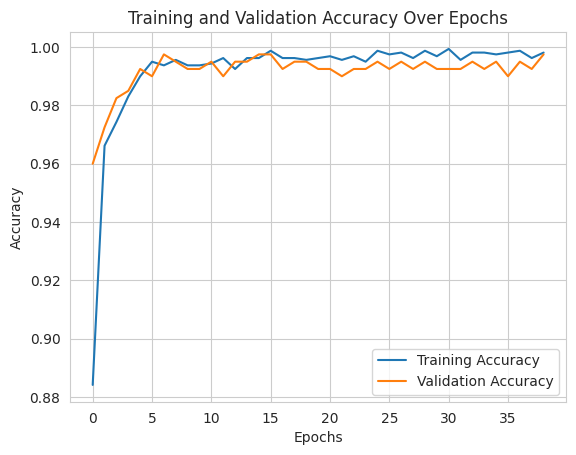
  
  **Observations (Training and Validation Loss Over Epochs Graph):**

  On this graph as well, we confirm that by the end 39 epoch, training and test loss stabalizes just above zero and we end the epochs before it grow apart again. This also indicates model optimization.

  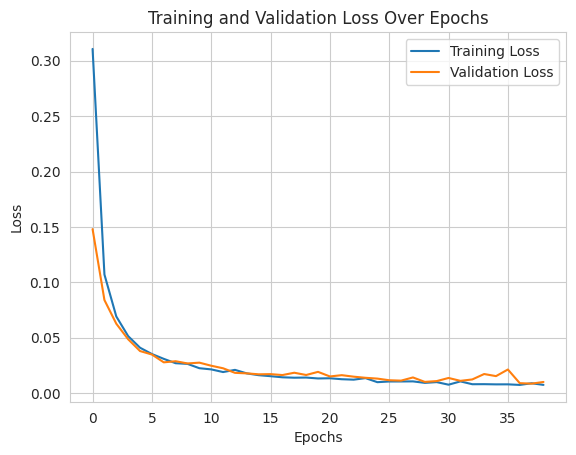  

  **Conclusion**

  We seem to have a optimized model this time with perfect number of epochs. However, there is one more point I am interested in the graph, which is at 15 epochs. Here, the accuracy of both training and test set seem to be highest it can ever be, prior to being 100%. So it would be logical to see what happends when we run the model at 15 epochs. However, the accuracies does not stabilize itself by this stage. I am confident that 15 epochs is very few to run the model on and it will result in underfitting. This is also confirmed by the loss graph above where the loss for both training and test set keep decreasing after 15 epochs. But I will still run this iteration to see the effects.


6. Decreased Number of Epochs to 15:

  **Observations (Training and Test Scores):**

   Surely the model has underperformed this time with acuracy score of only 99% on test set and 99.43% on training set. We also have zero FP and 4 FN on test set and 0 FP and 9 FN on training set which clearly indicates underfitting and tells us that the model is still learning. We have a precision score of 100%, a recall score of 93% and a F1 score of 96% on test set this time which indicates that the model had a difficult time indentifying positive cases (type 2 error).
   
   **Observations (Training and Validation Accuracy Over Epochs Graph):**
   
   The accuracy graph shows that the model is still learning and have not stabilized itself till the last epoch. This is indicated through the gap which forms by the 15th epoch. We know from previous iterations that this gap narrows down and stabilizes itself after few epochs.

   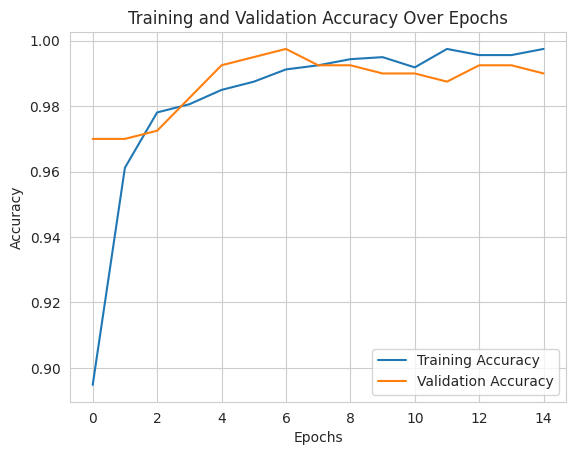
   
   **Observations (Training and Validation Loss Over Epochs Graph):**

   The loss graph shows that the model is still learning and have not stabilized itself till the last epoch. This is clear through the gap which widens by the 15th epoch and from previous iterations we have seen that this gap narrows down and stabilize itself after few epochs.

   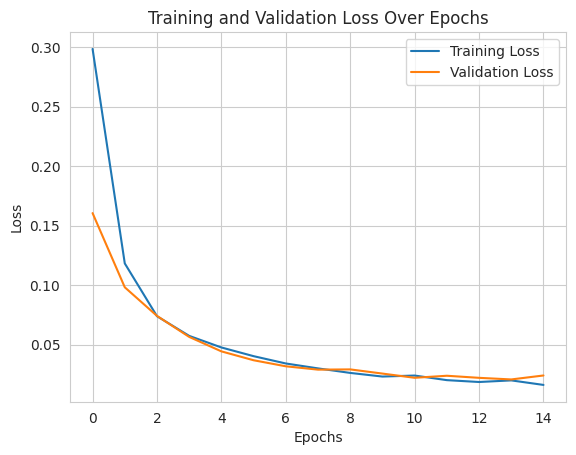
   
   **Conclusion**
   
   As hyphothesized before, 15 epochs seems to be too low for the model to learn and stabilize itself. Therefore, I am confident that 39 is the correct number of epocs for this model and I will return to that.
   
   **Note: I am confident at this stage that this is an optimized model for our dataset. Our dataset consist of only 3 features and 1997 observation. For small datasets like these, we don't need a complex model. Moreover, the model does not seem to have overfitting or underfitting issues now and is providing excellent results.**
   
   **From a business sense as well, having just one FN out of 400 predictions is a good model. Even though we have a type 2 error, we just have one out of 400.**
   
   **Anything we do after this will increase or decrease the complexity of the model and will surely result in overfitting or underfitting. For example if we use regularization methods through L1 and L2 or through dropout layers, the model might result in underfitting and if we increase the number of neurons in hidden layer, it might overfit. However, i will still go ahead and implement some of the hyperparameter tuning to see the effect till I am convinced that we already have a simple and optimized model for our predictions. Please note that I will just note down the scores after this stage rather than showing the effects on the graphs, as I am confident that the scores will give enough indications about overfitting and underfiting.**



  7. **Introducing a dropout layer with 20% dropout:**
  
  This results an underfitting with 96.25% accuracy on test set and 96.55% accuracy on training set. There are 15 FN in test set and 55 FN in training set with zero FP in both, indicating type 2 error. This is further confirmed by a recall score of only 72%, whereas the precison score is 100%. The F1 score on test set for this iteration came down to 84%, indicating a poor balance between precision and recall. As a result of underfitting, I will take out the dropout layer but for the next iteration, I will increase the number of neurons to 60.

  8. **Increasing number of neurons to 60 for both hidden layers**
  
  With increase in number of neurons, we find a overfitting issue where the test set accuracy is only 99% with all precision, recall and F1 score at 96%, while the training set accuracy is 99.74%. On the accuracy and loss graph as well there is a visible gap between training and test results where the model is learning on the training set but not able to generalise with test set. Therefore, I will decrease the number of neurons to 30 and we will surely see an underfitting.

  9. **Decreasing number of neurons to 30 for both hidden layers**
  
  Sure enough, decreasing the number of neurons to 30 generates an underfitting issue with 99.5% accuracy on test set and 99.68% on traning set. Training set also has 5 type 2 errors (FN) which indicates that the model is still learning. This is confirmed by the precision, recall and F1 score of 98% on test set which indicates that the model is not able to learn enough to generalise. From the accuracy and loss graphs it is clear that the model is still learning. Therefore, I will go back to 39 neurons.

  **Conclusion**

  I will conclude the hyperparameter tuning at this stage as I am confident that we have an optimized model. I am not experimenting with L1 and L2 regularization techniques as we have only 3 features. We cannot introduce L1 regularization with such low number of features as don't want one or two features to get selected and the rest ignored. Similarly, we cannot use L2 regularization, as we have seen in the heatmap above, the some features have moderate correlation with each other and we would'nt want to reduce the impact of any feature with such low numbers.

  I will also not experiment with learning rate or batch size, as by looking at the scores and the graphs, I am confident that the model is learning well and able to generalise as well. Therefore, our model seems to be reaching a global minimum with this learning rate and batch size.



## Summary

## Bibliography

[1] Glorot, X., Bordes, A., & Bengio, Y. (2011). Deep sparse rectifier neural networks. In Proceedings of the Fourteenth International Conference on Artificial Intelligence and Statistics (pp. 315-323): https://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf

[2] Li, K(Y). (2023). Vanishing and Exploding Gradients in Neural Network Models: Debugging, Monitoring, and Fixing: https://neptune.ai/blog/vanishing-and-exploding-gradients-debugging-monitoring-fixing#:~:text=Use%20ReLU%20as%20the%20activation%20function&text=As%20shown%20in%20this%20graph,won't%20be%20vanishing%20gradients.

[3] Kingma, D. P., & Ba, J. (2015). Adam: A method for stochastic optimization.arXiv:1412.6980: https://arxiv.org/pdf/1412.6980